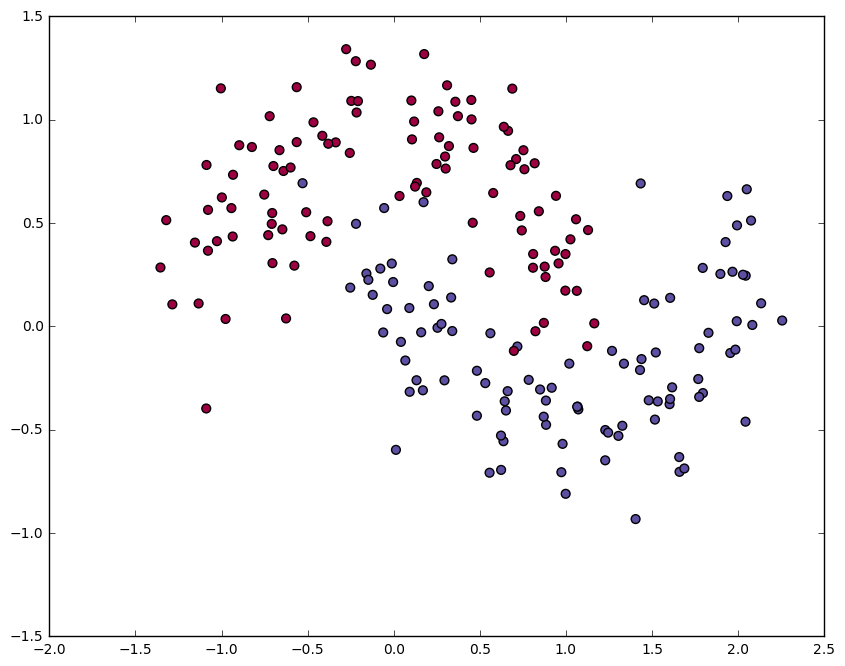

In [12]:
#Neural_Networks
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Generare si afisare/plotare dataset
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [13]:
# Invatarea clasificatorului
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

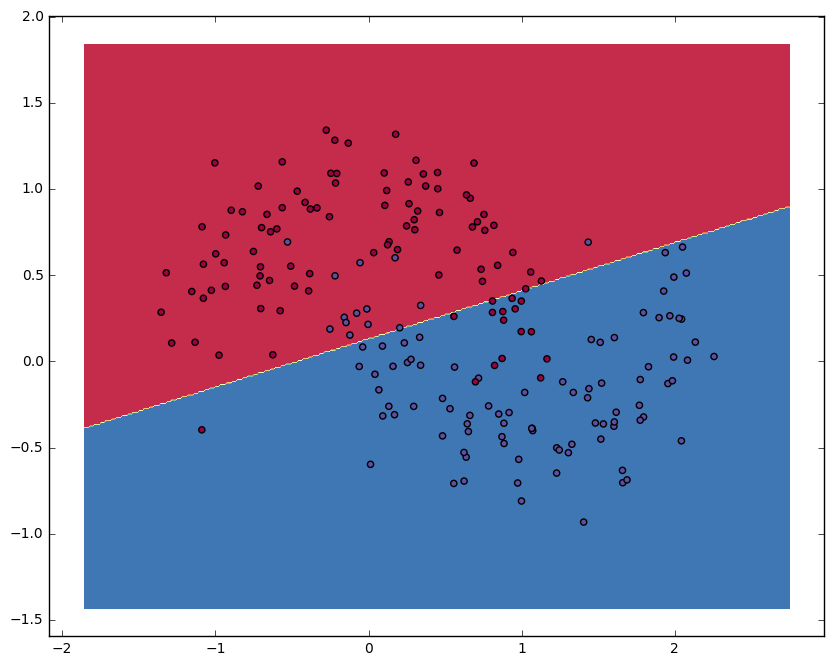

In [14]:
def plot_decision_boundary(pred_func):
    # Setarea valorilor de minim si maxim
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generarea unui grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Definim functia
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Afisarea exemplelor de trainning
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    

plot_decision_boundary(lambda x: clf.predict(x))


In [15]:
num_examples = len(X) # alegem marimea
nn_input_dim = 2 # dimensiune input
nn_output_dim = 2 # dimensiune output

# Alegem parametrii gradientului
epsilon = 0.01 # rata de invatare
reg_lambda = 0.01 # regularizare


# Functie care ne ajuta sa calculam eroarea
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']

    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
   
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
  
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

# Functie predictiva pentru output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
   
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

# Functie care invata parametrii retelei si returneaza modelul
# - nn_hdim: Numar de noduri in stratul ascuns
# - num_passes: Numarul de epoci prin datele de training pentru gradient 
# - print_loss: If True, printeaza eroarea la fiecare 1000 iteratii
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initializarea parameterilor cu valori care trebuiesc invatate de retea.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # Returnarea modelului
    model = {}
    
    # Gradientul pentru fiecare set
    for i in xrange(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Introducerea termenilor de regularizare
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Updatarea parametrilor gradientului
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Introducerea de noi parametrii in model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Printarea erorii
        if print_loss and i % 1000 == 0:
          print "Eroarea dupa iteratia %i: %f" %(i, calculate_loss(model))
    
    return model

Eroarea dupa iteratia 0: 0.546544
Eroarea dupa iteratia 1000: 0.322775
Eroarea dupa iteratia 2000: 0.321639
Eroarea dupa iteratia 3000: 0.313872
Eroarea dupa iteratia 4000: 0.316807
Eroarea dupa iteratia 5000: 0.321149
Eroarea dupa iteratia 6000: 0.323290
Eroarea dupa iteratia 7000: 0.325742
Eroarea dupa iteratia 8000: 0.329393
Eroarea dupa iteratia 9000: 0.197338
Eroarea dupa iteratia 10000: 0.320371
Eroarea dupa iteratia 11000: 0.298065
Eroarea dupa iteratia 12000: 0.321192
Eroarea dupa iteratia 13000: 0.322768
Eroarea dupa iteratia 14000: 0.325547
Eroarea dupa iteratia 15000: 0.326748
Eroarea dupa iteratia 16000: 0.330663
Eroarea dupa iteratia 17000: 0.329216
Eroarea dupa iteratia 18000: 0.193608
Eroarea dupa iteratia 19000: 0.321686


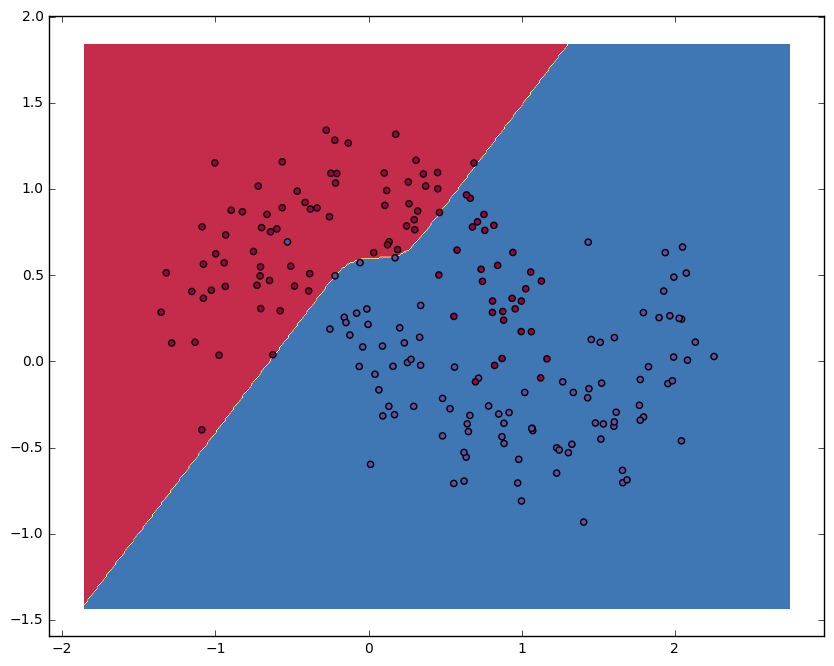

In [16]:
# Constructia modelului
model = build_model(2, print_loss=True)

plot_decision_boundary(lambda x: predict(model, x))